In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

# 大盘分析

In [2]:
from plot_index import Index_data

In [4]:
Index_data('上证综指').kline_plot(ktype=0)

In [6]:
Index_data('上证综指').kline_plot(ktype=1)

# 个股分析

## 导入数据库和个股py文件

In [7]:
from update_sql import update_sql,get_trade_date,info_sql
from RPS import get_data,RPS
from plot_stock import stock_plot

In [8]:
#更新数据库
update_sql()

数据库已更新至20200110日数据


In [9]:
#获取数据库信息
info_sql()

统计查询的总数：7870012
数据期间：20050104——20200110
数据库包含股票个数：3759


## 个股RPS相对强弱分析

In [10]:
data=get_data(date='20180901')

In [11]:
rps=RPS(data)
df=rps.date_rps()

In [13]:
#查看N日内强势股
df.sort_values('rps_250',ascending=False)[:50]

,rps_5,rps_20,rps_60,rps_120,rps_250
诚迈科技,99.546691,98.972499,99.697794,99.969779,99.969779
万集科技,37.322454,85.554548,98.942279,99.879118,99.939559
韦尔股份,90.964037,9.761257,97.793895,99.546691,99.909338
星期六,27.712300,99.969779,99.969779,99.939559,99.879118
圣邦股份,90.148081,7.615594,96.554850,99.667573,99.848897
北京君正,84.708371,4.925960,99.093382,99.697794,99.818676
领益智造,71.592626,79.087338,84.859474,98.458749,99.788456
闻泰科技,91.779994,3.928679,94.439408,99.637353,99.758235
兴齐眼药,19.099426,4.200665,1.299486,48.594742,99.728015
漫步者,0.513750,0.846177,99.939559,99.909338,99.697794


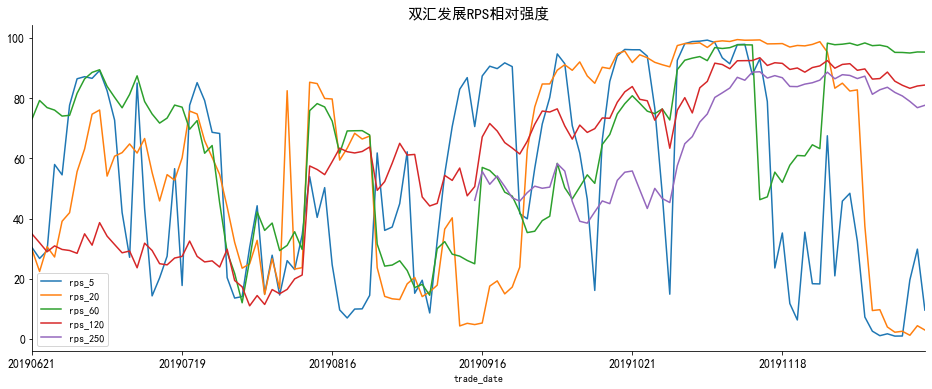

In [11]:
#个股rps时间序列图
rps.plot_stock_rps('双汇发展')

In [87]:
stock_plot('万集科技').kline_plot(ktype=1)

In [15]:
#根据rps选股
x1=(df.rps_250>90) & (df.rps_250<95)
x2=(df.rps_120>90) & (df.rps_120<95)
x3=(df.rps_60>90)  & (df.rps_60<100)
x4=(df.rps_20>90)  & (df.rps_20<100)
x5=(df.rps_5>90)   & (df.rps_5<100)
x=x1&x2&x3&x4&x5
stocks=list(df[x].index)
print(len(stocks))
print(stocks)

6
['中国宝安', '丽珠集团', '云南锗业', '博通股份', '同有科技', '新元科技']


In [21]:
i=5
stock_plot(stocks[i]).kline_plot(ktype=0)

In [45]:
stock_plot(stocks[i]).kline_plot(ktype=1)

In [22]:
def find_stock(n=20):
    stock_list=[]
    for c in data.columns:
        d0=data[c][-n]
        d1=data[c][-(n-2):-1].max()
        d2=data[c][-1]
        if 3<d2<20 and d1<d0<d2<d0*1.52:
            stock_list.append(c)
    print(len(stock_list))
    return stock_list

In [23]:
ss=find_stock(n=60)

3


In [24]:
ss

['中建环能', '花园生物', '荣晟环保']

In [85]:
from base import sql_engine,ts_pro
from datetime import datetime,timedelta
pro=ts_pro()
engine = sql_engine()

def get_price_vol_data():
    now=datetime.now()
    date=(now-timedelta(360)).strftime('%Y%m%d')
    sql=f'select * from daily_data where trade_date>{date}'
    all_data=pd.read_sql(sql,engine)
    all_data=all_data.sort_values(['ts_code','trade_date'])
    codes=list(all_data.ts_code.unique())
    #前复权
    all_data['adjclose']=all_data.groupby('ts_code').apply(lambda x:x.close*x.adj_factor/x.adj_factor.iloc[-1]).values
    all_data['adjvol']=all_data.groupby('ts_code').apply(lambda x:x.vol*x.adj_factor/x.adj_factor.iloc[-1]).values
    #设置索引
    all_data=all_data.set_index(['trade_date','ts_code'])[['adjclose','adjvol']]
    #转成面板数据
    all_data=all_data.unstack()
    return codes,all_data

def find_price_vol_stock(n):
    codes,all_data=get_price_vol_data()
    up_list=[]
    for code in codes:
        price=all_data['adjclose'][code]
        vol=all_data['adjvol'][code]
        #价格突破前N日新高
        p=price.iloc[-1]
        p0=price[-n:-1].max()
        if p0<p<p0*1.1 and \
           vol[-5:].mean()/vol[-n:-5].mean()>2:
            #print(code,'\t','突破上涨')
            up_list.append(code)
    return up_list

In [86]:
stocks=find_price_vol_stock(60)
len(stocks)

77

In [29]:
i=2
stock_plot(ss[i]).kline_plot(ktype=0)

In [26]:
from base import sql_engine,ts_pro
pro=ts_pro()
engine = sql_engine()
date='20191201'
sql=f'select * from daily_data where trade_date>{date}'
all_data=pd.read_sql(sql,engine)
all_data=all_data.sort_values(['ts_code','trade_date'])
#前复权
all_data['adjclose']=all_data.groupby('ts_code').apply(lambda x:x.close*x.adj_factor/x.adj_factor.iloc[-1]).values
all_data['adjvol']=all_data.groupby('ts_code').apply(lambda x:x.vol*x.adj_factor/x.adj_factor.iloc[-1]).values

In [27]:
all_data=all_data.set_index(['trade_date','ts_code'])[['adjclose','adjvol']]

In [19]:
get_trade_date()

'20200103'

In [28]:
all_data=all_data.unstack()
all_data

adjclose                                                    \
ts_code    000001.SZ 000002.SZ 000004.SZ 000005.SZ 000006.SZ 000007.SZ   
trade_date                                                               
20191202       15.36     28.05     19.90      2.98      5.16      9.77   
20191203       15.45     28.00     20.20      2.97      5.15      9.77   
20191204       15.31     27.78     20.57      2.97      5.14      9.73   
20191205       15.43     27.80     20.91      3.00      5.15      9.70   
20191206       15.60     27.86     21.31      3.00      5.19      9.60   
20191209       15.41     28.17     20.65      2.98      5.22     10.56   
20191210       15.33     27.90     20.47      2.98      5.20     10.50   
20191211       15.66     28.00     19.99      3.01      5.29     10.19   
20191212       15.60     28.00     19.87      2.99      5.17     10.06   
20191213       16.12     28.15     19.89      3.02      5.23     10.09   
20191216       16.13     29.45     20.19      3.06      5.30     10.10   
20191217       16.50     30.45     20.37      3.11      5.39     10.01   
20191218       16.46     30.31     21.28      3.17      5.36     10.12   
20191219       16.55     31.03     21.86      3.15      5.40      9.95   
20191220       16.59     31.68     21.62      3.09      5.37      9.80   
20191223       16.24     31.01     21.97      2.99      5.25      9.84   
20191224       16.40     30.38     21.59      3.05      5.27      9.77   
20191225       16.30     30.29     21.71      3.03      5.24      9.56   
20191226       16.47     31.12     23.43      3.10      5.29      9.51   
20191227       16.63     31.00     22.55      3.09      5.27      9.81   
20191230       16.57     31.57     22.59      3.08      5.32      9.72   
20191231       16.45     32.18     22.59      3.09      5.36      9.50   
20200102       16.87     32.56     22.33      3.14      5.40      9.55   
20200103       17.18     32.05     22.35      3.15      5.48      9.51   

                                                    ...    adjvol            \
ts_code    000008.SZ 000009.SZ 000010.SZ 000011.SZ  ... 688333.SH 688357.SH   
trade_date                                          ...                       
20191202        3.52      4.48      3.33      9.05  ...   8151.52       NaN   
20191203        3.52      4.48      3.32      9.05  ...   8306.10       NaN   
20191204        3.57      4.49      3.32      9.06  ...   7371.54  75651.19   
20191205        3.69      4.52      3.49      9.12  ...   7256.00  41575.66   
20191206        3.82      4.58      3.44      9.13  ...   6742.41  30406.76   
20191209        3.67      4.52      3.40      9.12  ...  15931.52  28063.02   
20191210        3.68      4.68      3.38      9.08  ...  33311.57  57013.12   
20191211        3.64      4.64      3.34      9.34  ...  17024.94  55753.27   
20191212        3.57      4.60      3.30      9.16  ...  12556.04  33323.33   
20191213        3.61      4.66      3.36      9.22  ...   9250.69  19919.80   
20191216        3.62      4.73      3.37      9.37  ...  11271.98  17459.85   
20191217        3.69      4.80      3.43      9.51  ...  20817.40  24056.71   
20191218        3.67      4.77      3.40      9.44  ...  24867.74  36920.42   
20191219        3.71      4.81      3.44      9.50  ...  23937.78  24677.69   
20191220        3.65      4.80      3.41      9.34  ...  14671.92  16064.62   
20191223        3.63      4.66      3.33      9.13  ...  12776.70  23093.00   
20191224        3.62      4.84      3.41      9.24  ...   6828.39  12225.21   
20191225        3.62      5.32      3.41      9.19  ...  12175.22  18895.56   
20191226        3.63      5.85      3.41      9.32  ...  16052.38  15860.00   
20191227        3.63      6.36      3.43      9.28  ...  11675.39  13317.46   
20191230        3.61      6.27      3.39      9.40  ...   7929.04   9861.33   
20191231        3.63      6.19      3.40      9.41  ...   6393.18   7621.50   
20200102        3.71      6.66      3.

In [59]:
all_data['adjclose']

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688333.SH,688357.SH,688358.SH,688363.SH,688366.SH,688368.SH,688369.SH,688388.SH,688389.SH,688399.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20191202,15.36,28.05,19.90,2.98,5.16,9.77,3.52,4.48,3.33,9.05,...,49.18,NaN,NaN,79.00,85.20,69.76,56.36,41.84,16.11,NaN
20191203,15.45,28.00,20.20,2.97,5.15,9.77,3.52,4.48,3.32,9.05,...,47.67,NaN,51.56,80.01,82.88,68.73,54.69,40.94,15.72,NaN
20191204,15.31,27.78,20.57,2.97,5.14,9.73,3.57,4.49,3.32,9.06,...,48.08,42.35,45.17,81.20,82.95,69.20,54.57,41.34,15.40,NaN
20191205,15.43,27.80,20.91,3.00,5.15,9.70,3.69,4.52,3.49,9.12,...,47.93,42.10,44.65,80.18,82.89,68.89,54.91,41.41,15.47,54.88
20191206,15.60,27.86,21.31,3.00,5.19,9.60,3.82,4.58,3.44,9.13,...,47.74,40.80,44.01,79.60,83.03,67.61,54.61,42.02,15.11,51.00
20191209,15.41,28.17,20.65,2.98,5.22,10.56,3.67,4.52,3.40,9.12,...,49.92,42.02,44.67,82.20,84.80,75.50,56.60,43.33,15.61,50.53
20191210,15.33,27.90,20.47,2.98,5.20,10.50,3.68,4.68,3.38,9.08,...,53.80,44.19,46.30,83.70,88.31,76.79,58.74,45.57,16.72,53.66
20191211,15.66,28.00,19.99,3.01,5.29,10.19,3.64,4.64,3.34,9.34,...,51.96,46.71,45.85,82.00,87.09,77.51,56.80,44.43,16.05,53.99
20191212,15.60,28.00,19.87,2.99,5.17,10.06,3.57,4.60,3.30,9.16,...,52.44,45.22,45.40,82.78,87.00,78.83,58.48,45.19,15.85,55.90


In [36]:
dd=all_data['adjvol']['000001.SZ']
dd[-3:].mean()/dd[-40:-20].mean()

2.136769562809221

In [40]:
all_data['adjclose']['000001.SZ'].iloc[-1]>all_data['adjclose']['000001.SZ'][:-1].max()

True